# Homework 5

# Due Date: 2024-11-20 at 8:30 AM PT

# Name: Alejandro Roa

#### 1. Load the data file.

In [1]:
import pandas as pd

In [2]:
covid_data = pd.read_csv('../data/processed/svi_covid.csv')

In [3]:
covid_data.head(1000)

,Unnamed: 0,fips_code,total_cases_per_100k,total_deaths_per_100k,E_TOTPOP,EP_POV150,EP_UNEMP,EP_HBURD,EP_NOHSDP,EP_UNINSUR,...,EP_DISABL,EP_SNGPNT,EP_LIMENG,EP_MINRTY,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ,EP_NOINT
0,1,1001,33888.123075,399.925120,58761,20.2,2.8,19.7,9.6,7.4,...,16.4,5.6,0.4,27.4,3.9,15.6,1.4,4.0,0.9,10.9
1,2,1003,30212.064090,313.169394,233420,18.3,3.4,23.2,8.4,9.3,...,13.9,4.2,0.8,17.7,16.6,10.2,1.9,2.3,1.5,10.9
2,3,1005,30477.951521,418.056840,24877,37.7,5.8,25.1,23.5,10.7,...,18.1,11.3,2.0,55.4,1.4,29.2,3.8,11.7,12.0,31.8
3,4,1007,36623.073120,498.853984,22251,29.0,8.7,23.2,21.1,8.4,...,19.6,7.2,0.3,25.8,2.7,30.6,1.3,7.5,6.4,20.2
4,5,1009,31944.750072,441.796300,59077,22.9,6.0,19.4,18.2,10.2,...,17.0,5.3,2.2,14.3,0.9,23.9,2.3,4.8,1.0,16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,21019,48575.929688,451.888396,48242,26.8,6.9,23.3,11.3,5.4,...,21.9,7.6,0.2,7.8,4.9,10.1,1.0,8.7,3.6,13.9
996,997,21021,37800.934244,565.119394,30613,25.3,6.2,27.5,9.6,5.9,...,17.3,7.2,0.5,15.5,2.3,5.3,0.4,5.8,9.4,15.5
997,998,21023,33230.403800,344.418052,8420,27.8,6.2,17.5,12.0,4.1,...,17.0,5.7,0.0,4.5,2.6,25.9,1.9,2.6,0.3,16.6
998,999,21025,40640.648012,567.010309,13580,38.3,8.9,18.6,20.5,3.7,...,30.6,6.3,0.1,3.9,1.1,38.4,3.6,13.3,2.2,25.1


# Homework - Neural Networks

#### 1. Use a simple neural network to predict the number of per-capita COVID-19 deaths in each county in the US using the SVI variables. The outcome variable is `total_deaths_per_100k` and the predictor variables are `EP_POV150, EP_UNEMP, EP_HBURD, EP_NOHSDP, EP_UNINSUR, EP_AGE65, EP_AGE17, EP_DISABL, EP_SNGPNT, EP_LIMENG, EP_MINRTY, EP_MUNIT, EP_MOBILE, EP_CROWD, EP_NOVEH, EP_GROUPQ, EP_NOINT`. The neural network should have one hidden layer with 10 nodes and use the ReLU activation function. Plot the predicted values against the true values. What is the mean squared error of the predictions in the test set?

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [53]:
predictor_columns = [
    'EP_POV150', 'EP_UNEMP', 'EP_HBURD', 'EP_NOHSDP', 'EP_UNINSUR', 'EP_AGE65', 
    'EP_AGE17', 'EP_DISABL', 'EP_SNGPNT', 'EP_LIMENG', 'EP_MINRTY', 'EP_MUNIT',
    'EP_MOBILE', 'EP_CROWD', 'EP_NOVEH', 'EP_GROUPQ', 'EP_NOINT'
]
outcome = 'total_deaths_per_100k'

In [54]:
X = covid_data[predictor_columns].values
y = covid_data[outcome].values

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
#Standarize and thorch tensors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [60]:
##Neural network

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.hidden = nn.Linear(len(predictor_columns), 10)  # Hidden layer with 10 nodes
        self.output = nn.Linear(10, 1)                      # Output layer
        self.relu = nn.ReLU()                               # ReLU activation

    def forward(self, x):
        x = self.relu(self.hidden(x))  # Apply ReLU
        x = self.output(x)             # Final output
        return x

model = NeuralNetwork()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [61]:
##Train the model

epochs = 100
for epoch in range(epochs):

    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()



In [62]:
mse = mean_squared_error(y_test, y_pred)


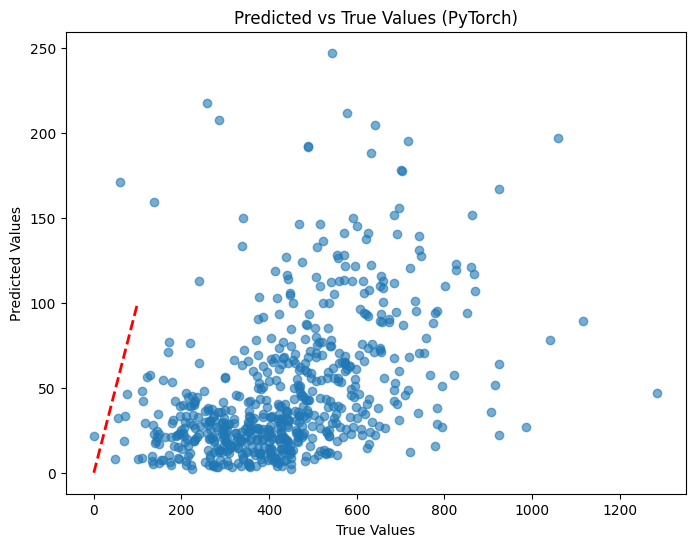

np.float64(178709.02116867164)

In [63]:
###Predicted values vs true values

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0, 100], [0, 100], color='red', linestyle='--', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values (PyTorch)')
plt.show()

mse


#### 2. Repeat the analysis from the previous question, but this time use a more complicated neural network with more hidden layers and/or more nodes in the hidden layers. You should experiment with different architectures and activation functions to see what works best. Plot the predicted values against the true values. What is the mean squared error of the predictions in the test set?